# Citations: 


CRNN Model for Genre Classification - Priya Dwivedi: https://github.com/priya-dwivedi/Music_Genre_Classification 

GTZAN Dataset with sliced audios: https://drive.google.com/drive/folders/1thlHfYV1cjNPCkuFg-e81nalDVyYf4OH?usp=sharing 

Original GTZAN Dataset: http://marsyas.info/downloads/datasets.html 


# **Load in GTZAN Dataset**

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#audo_dataset = open('drive/MyDrive/Data/genres_original')

#audio_dataset.read()
import pandas as pd


audio_data_3 = pd.DataFrame(pd.read_csv('drive/MyDrive/GTZAN Data/features_3_sec.csv'))

audio_data_30 = pd.DataFrame(pd.read_csv('drive/MyDrive/GTZAN Data/features_30_sec.csv'))




In [42]:
import os
##FOLDER_PATH = 'labelled-dataset'
#ROOT_PATH = '/content/drive/MyDrive/'
#print(len(os.listdir('drive/MyDrive/GTZAN Data/sliced_audios')))


# Split each audio into 10 parts (3 second clips)


In [ ]:
pip install pydub

In [ ]:
a = 'drive/My Drive/GTZAN Data/genres_original/blues.00000.wav'
a[42:a.index('.')]

'blues'

In [ ]:
from pydub import AudioSegment
def get_wavs():
  #new_files = []
  for _file in audio_data_30['filename']:
    if not _file == 'jazz.00054.wav':
      full_file = 'drive/My Drive/GTZAN Data/genres_original/' + _file
      genre = _file[:_file.index('.')]
      start = 0
      end = 3000
      for interval in range(10):
        audio_segment = AudioSegment.from_wav(full_file)[start:end]
        new_path = 'drive/My Drive/GTZAN Data/sliced_audios/'+ _file[:_file.index('w')]+ str(interval) + '.wav'
        audio_segment.export(new_path, format="wav")
        #new_files.append((new_path, genre))
        start += 3000
        end+= 3000
  #return new_files

In [ ]:
get_wavs()

In [23]:
import os

all_files = os.listdir('drive/MyDrive/GTZAN Data/sliced_audios')

In [ ]:

all_files = list(reversed(all_files))
all_files



#Make a Dictionary mapping sliced audio to its genres

In [30]:
def get_spectrogram(file):
  time_series, sample_rate = librosa.load(file, sr = 44100)
  mel_spec = librosa.feature.melspectrogram(time_series, sr = sample_rate)
  mel_spec = librosa.core.amplitude_to_db(mel_spec)

  return mel_spec

In [25]:
file_to_genre = {}
for file in all_files:
  file_to_genre[file] = file[:file.index('.')]



#Make a Dictionary mapping genre to a one hot encoding of their label

In [26]:
import numpy as np
def one_hot_encode(label, num_classes = 10):
  hot = np.zeros(num_classes)
  hot[label] = 1
  return hot



In [27]:
# First, correspong each genre to an integer to be one hot encoded
genre_to_id = {'blues': 0, 'classical': 1, 'country': 2, 
               'disco': 3, 'hiphop': 4, 'jazz': 5,
               'metal': 6, 'pop': 7, 'reggae': 8, 
               'rock':9}
genre_to_hot = {}
for genre in file_to_genre.values():
  genre_to_hot[genre] = one_hot_encode(genre_to_id[genre])

genre_to_hot


{'blues': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'classical': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'country': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'disco': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'hiphop': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'jazz': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'metal': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'pop': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'reggae': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'rock': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

#Make Mel Spectrograms

In [28]:
import librosa

# Make a list of all spectrograms

In [ ]:
from IPython.display import Audio

Audio('drive/MyDrive/Data/'+file)

In [46]:
audio_specs = []
for file in all_files:

  audio_specs.append(get_spectrogram('drive/MyDrive/GTZAN Data/sliced_audios/'+file))


In [61]:
len(audio_specs)

9990

#Cleaning up Spectrogram Data

In [60]:

from statistics import mode
col_shapes = [spec.shape[1] for spec in audio_specs]

#print(col_shapes.count(2586) )
#print(col_shapes.count(2585))
print(len([shape for shape in col_shapes if shape > 259]))
print(len([shape for shape in col_shapes if shape < 259]))
print(mode(col_shapes))
print(min(col_shapes))

0
4
259
253


In [63]:
save_specs = audio_specs[:]
len(save_specs)

9990

In [64]:
#remove = []
print(len(save_specs))
for i in range(len(save_specs)):
  if save_specs[i].shape[1] > 253:
      idxs = np.arange(253, save_specs[i].shape[1])
      save_specs[i] = np.delete(save_specs[i], [idxs], axis=1)
#for spec in audio_specs:

print(len(save_specs))






9990
9990


#Save spectrograms to an NPY file

In [35]:
from numpy import asarray
from numpy import save

audio_specs= asarray(audio_specs)
save('audio_specs.npy',audio_specs)

In [36]:
import numpy as np
audio_specs = np.load('drive/My Drive/audio_specs.npy')

In [37]:
len(audio_specs)

999

Make Training and Validation Sets

In [65]:
#all_labels = genre_to_hot.values()
#all_labels[:50]
all_labels = []
for genre in file_to_genre.values():
  all_labels.append(genre_to_hot[genre])

len(all_labels)

9990

In [66]:
# Read in all values and shuffle
import numpy as np
cutoff = 0.8
inputs = np.array(save_specs) 
idxs = np.arange(len(save_specs))
np.random.shuffle(idxs)
print(idxs[0])
train_set = inputs[idxs][:int(len(save_specs) * cutoff)]
train_labels = np.array(all_labels)[idxs][:int(len(save_specs) * cutoff)]
test_set = inputs[idxs][int(len(save_specs) * cutoff):]
test_labels = np.array(all_labels)[idxs][int(len(save_specs) * cutoff):]
print(train_set[0])

#799



4773
[[ -7.4717293  -13.557655   -13.557655   ...  54.319572    54.064888
   53.77398   ]
 [ -0.9428033  -11.908184   -13.557655   ...  60.314774    60.027763
   59.709053  ]
 [  0.48797962 -10.506069   -13.557655   ...  38.67866     39.156124
   39.109356  ]
 ...
 [-13.557655   -13.557655   -13.557655   ... -13.557655   -13.557655
  -13.557655  ]
 [-13.557655   -13.557655   -13.557655   ... -13.557655   -13.557655
  -13.557655  ]
 [-13.557655   -13.557655   -13.557655   ... -13.557655   -13.557655
  -13.557655  ]]


In [67]:
inputs[4773]

array([[ -7.4717293 , -13.557655  , -13.557655  , ...,  54.319572  ,
         54.064888  ,  53.77398   ],
       [ -0.9428033 , -11.908184  , -13.557655  , ...,  60.314774  ,
         60.027763  ,  59.709053  ],
       [  0.48797962, -10.506069  , -13.557655  , ...,  38.67866   ,
         39.156124  ,  39.109356  ],
       ...,
       [-13.557655  , -13.557655  , -13.557655  , ..., -13.557655  ,
        -13.557655  , -13.557655  ],
       [-13.557655  , -13.557655  , -13.557655  , ..., -13.557655  ,
        -13.557655  , -13.557655  ],
       [-13.557655  , -13.557655  , -13.557655  , ..., -13.557655  ,
        -13.557655  , -13.557655  ]], dtype=float32)

In [68]:
print(train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
pip install keras-utils

  Created wheel for keras-utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2657 sha256=34f284b89f8c3aeebf8ed7e56937cf563181c6da1d04ebdd615da3152e7b0587
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras-utils


In [ ]:
def one_hot_encode(label, num_classes):
  hot = np.zeros(num_classes)
  hot[label] = 1
  return hot

In [ ]:

genre_to_id = {'blues': [1,0,0,0,0,0,0,0,0,0], 'classical': [0,1,0,0,0,0,0,0,0,0], 'country': [0,0,1,0,0,0,0,0,0,0], 
               'disco': [0,0,0,1,0,0,0,0,0,0], 'hiphop': [0,0,0,0,1,0,0,0,0,0], 'jazz': [0,0,0,0,0,1,0,0,0,0],
               'metal': [0,0,0,0,0,0,1,0,0,0], 'pop': [0,0,0,0,0,0,0,1,0,0], 'reggae': [0,0,0,0,0,0,0,0,1,0], 
               'rock': [0,0,0,0,0,0,0,0,0,1]}

train_labels = list(train_labels)
for i in range(len(train_labels)):
  
  train_labels[i] = genre_to_id[train_labels[i]]
  


test_labels = list(test_labels)
for i in range(len(test_labels)):
  test_labels[i] = genre_to_id[test_labels[i]]



In [ ]:
test_labels = np.array(test_labels)
train_labels = np.array(train_labels)

In [ ]:

import tensorflow as tf

**CRNN Model**

In [75]:
N_LAYERS = 3
FILTER_LENGTH = 5
CONV_FILTER_COUNT = 56
batch_size = 50
LSTM_COUNT = 96
EPOCH_COUNT = 100
NUM_HIDDEN = 64
L2_regularization = 0.003

def conv_recurrent_model_build(model_input, num_classes = 10, n_layers = 3, filter_size = 5, num_filters = 56,lstm_cnt = 96, num_hidden = 64, l2_reg = 0.001):
    print('Building model...')
    layer = model_input
    
    ### 3 1D Convolution Layers
    for i in range(n_layers):
        # give name to the layers
        layer = Conv1D(
                filters=num_filters,
                kernel_size=filter_size,
                kernel_regularizer=regularizers.l2(l2_reg),  
                name='convolution_' + str(i + 1)
            )(layer)
        layer = BatchNormalization(momentum=0.9)(layer)
        layer = Activation('relu')(layer)
        layer = MaxPooling1D(2)(layer)
        layer = Dropout(0.5)(layer)
    
    ## LSTM Layer
    layer = LSTM(lstm_cnt, activation="relu", return_sequences=False)(layer)
    layer = Dropout(0.5)(layer)
    
    ## Dense Layer
    layer = Dense(num_hidden, kernel_regularizer=regularizers.l2(l2_reg), name='dense1')(layer)
    layer = Dropout(0.5)(layer)
    
    ## Softmax Output
    layer = Dense(num_classes)(layer)
    layer = Activation('softmax', name='output_realtime')(layer)
    model_output = layer
    model = Model(model_input, model_output)
    
    
    opt = SGD(learning_rate=0.01)
    model.compile(
            loss='categorical_crossentropy',
            optimizer=opt,
            metrics=['accuracy']
        )
    
    #print(model.summary())
    return model

In [76]:
def train_model(x_train, y_train, x_val, y_val):
    
    n_features = x_train.shape[2]
    input_shape = (None, n_features)
    model_input = Input(input_shape, name='input')
    
    model = conv_recurrent_model_build(model_input)

    checkpoint = ModelCheckpoint('best_params.hd5', monitor='val_accuracy', verbose=1,
                                          save_best_only=True, mode='max')
    
    reducelr = ReduceLROnPlateau(
                monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01,
                verbose=1
            )
    callbacks = [checkpoint, reducelr]

    # Fit the model and get training history
    
    history = model.fit(x_train, y_train, batch_size=32, epochs=EPOCH_COUNT,
                        validation_data=(x_val, y_val), verbose=1, callbacks=callbacks)

    return model, history

In [71]:
def show_summary_stats(history):
    # List all data in history
    print(history.history.keys())

    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [72]:
import numpy as np
import os
from os.path import isfile
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Dense, TimeDistributed, LSTM, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, Flatten, Conv2D, BatchNormalization, Lambda
from keras.layers.advanced_activations import ELU
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from keras import backend
from keras.utils import np_utils
from keras.optimizers import RMSprop, SGD

from keras import regularizers

import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:

model, history  = train_model(train_set, train_labels, test_set, test_labels)

Building model...
Epoch 1/100
250/250 [==============================] - 52s 185ms/step - loss: 2.6522 - accuracy: 0.1327 - val_loss: 2.4322 - val_accuracy: 0.2297

Epoch 00001: val_accuracy improved from -inf to 0.22973, saving model to best_params.hd5
INFO:tensorflow:Assets written to: best_params.hd5/assets
Epoch 2/100
250/250 [==============================] - 55s 221ms/step - loss: 2.4314 - accuracy: 0.1911 - val_loss: 2.4084 - val_accuracy: 0.2207

Epoch 00002: val_accuracy did not improve from 0.22973
Epoch 3/100
250/250 [==============================] - 52s 208ms/step - loss: 2.3692 - accuracy: 0.2069 - val_loss: 2.3661 - val_accuracy: 0.2227

Epoch 00003: val_accuracy did not improve from 0.22973
Epoch 4/100
250/250 [==============================] - 52s 210ms/step - loss: 2.3353 - accuracy: 0.2367 - val_loss: 2.2995 - val_accuracy: 0.2437

Epoch 00004: val_accuracy improved from 0.22973 to 0.24374, saving model to best_params.hd5
INFO:tensorflow:Assets written to: best_param

In [ ]:
train_labels.shape

(349,)

In [ ]:
train_set.shape

(349, 128, 2586)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


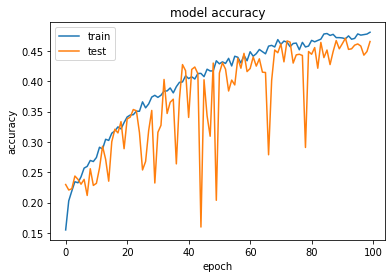

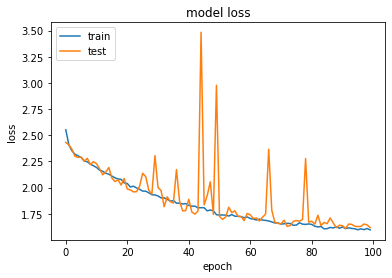

In [78]:
show_summary_stats(history)